In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


### Generating List of Lat, longs and Cities

In [2]:
#List for holding Latitudes and Longitudes and cities

lats_longs = []
cities = []

#random lats and longs and subsequent cities

latis = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
longis = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

lats_longs = zip (latis, longis)

# df = pd.DataFrame (lats_longs)
# df.head()

# Identify Nearest city to lat - long
for lat_lng in lats_longs:
    cit = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = cit.city_name
    if city not in cities: 
        cities.append(city)
print (len(cities))

632


### Collect Weather Data on each City using API calls

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")  

Processing record 1|otradnoye
Processing record 2|castro
Processing record 3|tommot
Processing record 4|mataura
Processing record 5|vardo
Processing record 6|taoudenni
Processing record 7|hobart
Processing record 8|george town
Processing record 9|eregli
Processing record 10|skjervoy
Processing record 11|naze
Processing record 12|bengkulu
Processing record 13|rikitea
Processing record 14|vaini
Processing record 15|hilo
Processing record 16|ilulissat
Processing record 17|ushuaia
Processing record 18|albany
Processing record 19|atuona
Processing record 20|suntar
Processing record 21|punta arenas
Processing record 22|port elizabeth
Processing record 23|carmen
Processing record 24|jalu
Processing record 25|korla
Processing record 26|fairbanks
Processing record 27|east london
Processing record 28|torbay
Processing record 29|homer
Processing record 30|krasnokamensk
Processing record 31|honiara
Processing record 32|arraial do cabo
Processing record 33|namatanai
Processing record 34|kupang
Proc

Processing record 255|williams lake
Processing record 256|mar del plata
Processing record 257|pontal do parana
Processing record 258|aksu
Processing record 259|nalut
Processing record 260|chapais
Processing record 261|kamogawa
Processing record 262|huarmey
Processing record 263|tazovskiy
City not found. skipping.
Processing record 264|kemijarvi
Processing record 265|yarmouth
Processing record 266|acapulco
Processing record 267|huanuni
Processing record 268|mount isa
Processing record 269|ust-nera
Processing record 270|ewa beach
Processing record 271|shimoda
City not found. skipping.
Processing record 272|hanting
Processing record 273|porto novo
Processing record 274|bairiki
Processing record 275|hobyo
Processing record 276|pringsewu
Processing record 277|la ronge
Processing record 278|artyom
Processing record 279|san policarpo
Processing record 280|komsomolskiy
Processing record 281|avera
Processing record 282|rawson
Processing record 283|innisfail
Processing record 284|luau
Processing

Processing record 504|dali
Processing record 505|piacabucu
Processing record 506|turukhansk
Processing record 507|oranjemund
Processing record 508|chunoyar
Processing record 509|misratah
Processing record 510|waynesville
Processing record 511|otjiwarongo
Processing record 512|praya
Processing record 513|padang
Processing record 514|harper
Processing record 515|tiznit
City not found. skipping.
Processing record 516|bac lieu
Processing record 517|oga
Processing record 518|pangoa
Processing record 519|raga
Processing record 520|san patricio
Processing record 521|rudnogorsk
City not found. skipping.
Processing record 522|ndioum
Processing record 523|vila franca do campo
Processing record 524|klaksvik
Processing record 525|andenes
Processing record 526|udachnyy
Processing record 527|pafos
Processing record 528|karratha
Processing record 529|bogale
Processing record 530|kautokeino
Processing record 531|walvis bay
Processing record 532|kangaatsiaq
Processing record 533|mayo
Processing record 

### Make DataFrame of data pulled from OpenWeather

In [4]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_files/city.csv")

#Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Otradnoye,100,RU,1650816859,78,59.7775,30.8181,48.87,9.62
1,Castro,39,BR,1650816887,61,-24.7911,-50.0119,75.45,2.26
2,Tommot,100,RU,1650816888,96,58.9564,126.2925,23.79,1.07
3,Mataura,100,NZ,1650816888,89,-46.1927,168.8643,52.48,6.11
4,Vardø,100,NO,1650816888,89,70.3705,31.1107,37.65,11.32


In [5]:
city_df.count()

City          588
Cloudiness    588
Country       588
Date          588
Humidity      588
Lat           588
Lng           588
Max Temp      588
Wind Speed    588
dtype: int64

### Plots for visualizations

In [10]:
timestamp = city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)
shortened_timestamp

datetime.date(2022, 4, 24)

### Temp (F) vs Latitude

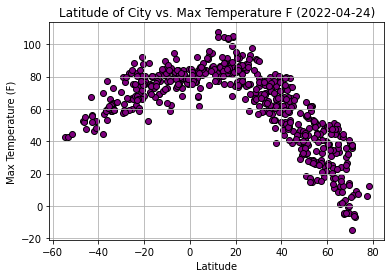

In [13]:
#Converting Date for title of plot
timestamp = city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "purple",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude of City vs. Max Temperature F ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_temp_plot")
plt.show()

### Humidity (%) of City vs Latitude

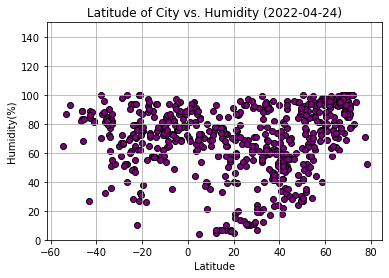

In [16]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "purple",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"Latitude of City vs. Humidity ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_humidity_plot")
plt.show()

### Cloudiness (%) vs. Latitude

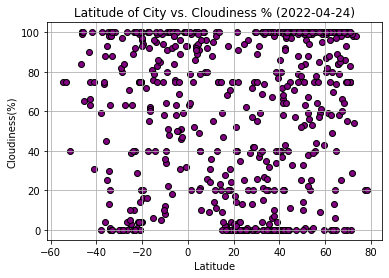

In [17]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "purple",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"Latitude of City vs. Cloudiness % ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_cloudiness_plot")
plt.show()

### Wind Speed (mph) vs Latitude

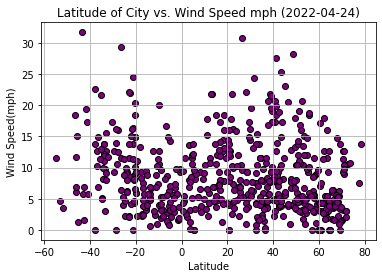

In [18]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "purple",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"Latitude of City vs. Wind Speed mph ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_windSpeed_plot")
plt.show()

### Defining Linear Regression Variable in Plot

In [25]:
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15, Color ="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

### Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: -0.8622064287366149


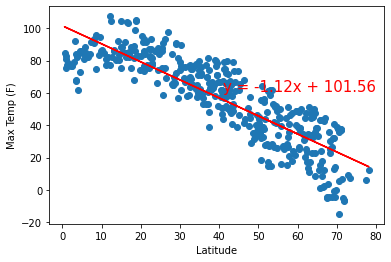

None


In [27]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression 

The r-squared is: 0.7472214640026836


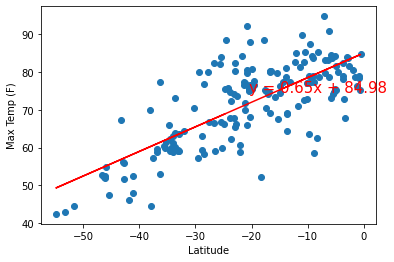

None


In [28]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

#### Observations - Northern Hemisphere temps seem to follow a roughly linear trend and  reduce as Latitude Increases. Southern Hemisphere shows a relatively linear increase in Temp as Latitude moves towards the equator 

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.343036485736436


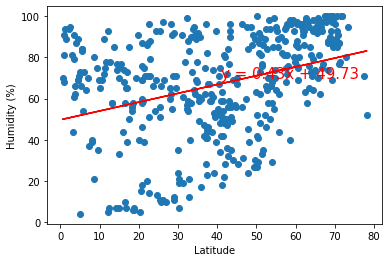

None


In [29]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.018842290300520093


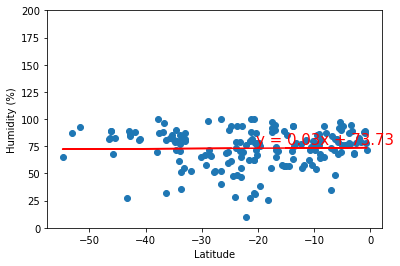

None


In [30]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

## Observations: 
Northern Hemisphere: 
Although humidity seems to increase with latitude in Northern Hemisphere, it does not follow a relative linear trend and is probably influenced by other factors like proximity to sea / Ocean etc. 
For example - Humidity ranges from zero % to almost 100% at Latitudes less than 10 indicating extreme dry and hot climates like deserts, but generally seems to be above 20% with latitudes above 40 degrees.

Southern Hemisphere: 
Interestingly, humidity seems to be relatively high in the southern Hemisphere and almost falls between 50-75% range

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2693341155921243


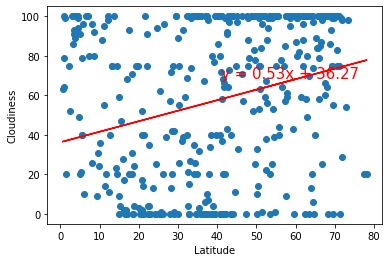

None


In [31]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10057545273521135


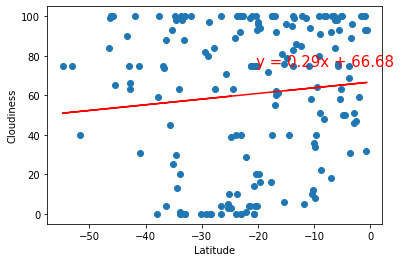

None


In [32]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1400435876023542


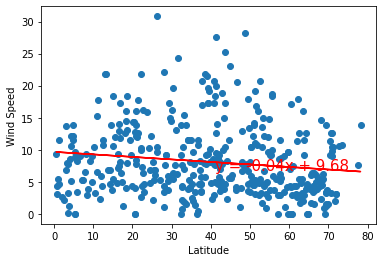

None


In [33]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.32708761048584917


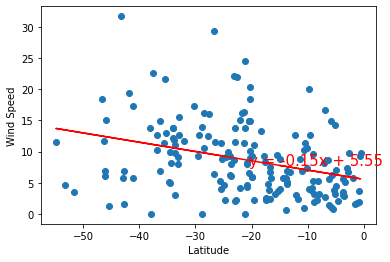

None


In [34]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))